# Modelling From Measurments Course Home Work

In [30]:
############################### Import Libraries ###########################
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from pydmd import DMD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import pysindy as ps
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
    # Code that generates warnings

ModuleNotFoundError: No module named 'shred'

# Load Data
In this 

In [11]:
path = r'data/test5_1d.csv'
data = pd.read_csv(path, index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True, drop=True)

print(data.head())

            Volume  Open  High       Low  Close
Date                                           
2018-01-02    8944  8.05  8.13  7.730000   7.79
2018-01-03    7528  7.75  7.97  7.730000   7.82
2018-01-04    7649  7.89  7.92  7.740000   7.76
2018-01-05    5342  7.75  7.84  7.740000   7.78
2018-01-08   12789  7.76  7.92  7.609231   7.67


# Add Features

In [12]:
#################### Add Features to data ###################
data['MA60'] = data['Close'].rolling(window=60).mean()
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['RSI'] = ta.rsi(data['Close'], length=14)
macd = ta.macd(data['Close'], fast=12, slow=26, signal=9)
data['MACD'] = macd['MACD_12_26_9']
data['MACD_signal'] = macd['MACDs_12_26_9']
bbands = ta.bbands(data['Close'], length=20, std=2)
data['BB_Middle'] = bbands['BBM_20_2.0']  # Middle Band
data['BB_Upper'] = bbands['BBU_20_2.0']   # Upper Band
data['BB_Lower'] = bbands['BBL_20_2.0']   # Lower Band
data.dropna(inplace=True)
print(data)

            Volume   Open       High        Low      Close       MA60  \
Date                                                                    
2018-03-26   13135  12.59  13.110000  12.450000  12.950000   9.622167   
2018-03-27   19922  13.08  13.740000  12.870000  13.650476   9.719841   
2018-03-28   34621  13.73  14.170000  12.700000  13.020000   9.806508   
2018-03-29   13901  12.96  13.500000  12.900000  13.320000   9.899174   
2018-04-03   17698  13.25  13.340000  12.513571  13.300000   9.991174   
...            ...    ...        ...        ...        ...        ...   
2023-06-05   23218  79.05  83.410000  78.010000  82.860000  88.995514   
2023-06-06   17637  83.00  83.480000  80.280000  81.640000  88.686681   
2023-06-07   17777  81.64  84.092308  80.080000  83.860000  88.492972   
2023-06-08   15161  83.99  84.950000  82.569259  83.350000  88.334306   
2023-06-09    7723  83.44  85.630000  83.440000  85.126250  88.265910   

                EMA20        RSI      MACD  MACD_s

# target claculation

In [13]:
data['target'] = data['Close'] - data['Close'].shift(-1)
data['target'] = (data['target'] > 0).astype(int)
data.dropna(inplace=True)

print(data.head())

            Volume   Open   High        Low      Close      MA60      EMA20  \
Date                                                                          
2018-03-26   13135  12.59  13.11  12.450000  12.950000  9.622167  11.323217   
2018-03-27   19922  13.08  13.74  12.870000  13.650476  9.719841  11.544861   
2018-03-28   34621  13.73  14.17  12.700000  13.020000  9.806508  11.685350   
2018-03-29   13901  12.96  13.50  12.900000  13.320000  9.899174  11.841031   
2018-04-03   17698  13.25  13.34  12.513571  13.300000  9.991174  11.979981   

                  RSI      MACD  MACD_signal  BB_Middle   BB_Upper  BB_Lower  \
Date                                                                           
2018-03-26  79.800600  0.776014     0.637313  11.162500  12.901176  9.423824   
2018-03-27  83.348003  0.865848     0.683020  11.337024  13.321505  9.352543   
2018-03-28  71.223704  0.876068     0.721630  11.483024  13.511160  9.454888   
2018-03-29  73.219933  0.898024     0.756908  

# data normalization

In [14]:
for column in list(data.columns):

    min = data[column].min()
    max = data[column].max()
    data[column] = (data[column] - min) / (max - min)

print(data.head())

              Volume      Open      High       Low     Close      MA60  \
Date                                                                     
2018-03-26  0.126773  0.000000  0.000454  0.000000  0.003082  0.000000   
2018-03-27  0.195540  0.005596  0.007600  0.004852  0.011077  0.001163   
2018-03-28  0.344472  0.013018  0.012477  0.002888  0.003881  0.002196   
2018-03-29  0.134534  0.004225  0.004877  0.005199  0.007305  0.003299   
2018-04-03  0.173006  0.007537  0.003063  0.000734  0.007077  0.004395   

               EMA20       RSI      MACD  MACD_signal  BB_Middle  BB_Upper  \
Date                                                                         
2018-03-26  0.000000  0.882223  0.573366     0.525460   0.000000  0.000000   
2018-03-27  0.002623  0.929866  0.580917     0.530525   0.002040  0.004511   
2018-03-28  0.004285  0.767030  0.581776     0.534804   0.003746  0.006547   
2018-03-29  0.006127  0.793841  0.583621     0.538713   0.005692  0.008645   
2018-04-03  0

# Plot Correlation Heatmap 

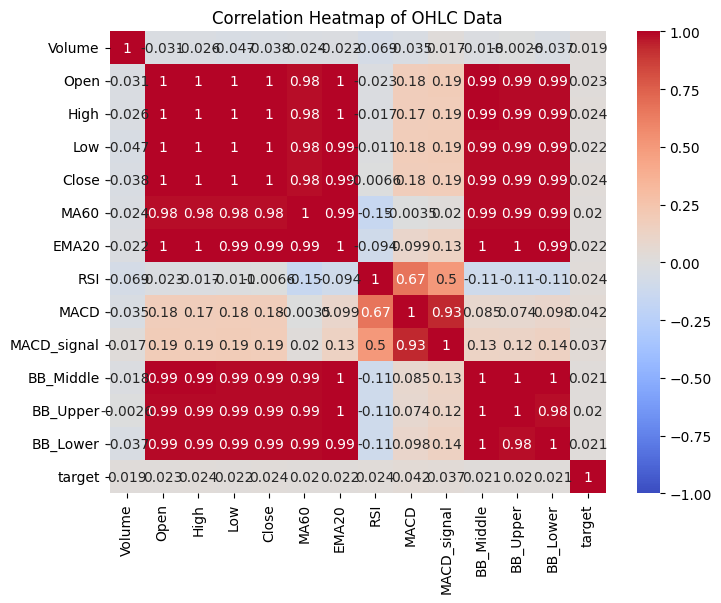

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of OHLC Data')
plt.show()

# train and test seperation

In [16]:
x = data.drop(columns=['target']).values # Features
y = data['target'].values  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Shape of x_train is:  ', len(x_train))
print('Shape of y_train is:  ', len(y_train))
print('Shape of x_train is:  ', len(x_test))
print('Shape of y_test is:  ', len(y_test))
print(type(x_test))

Shape of x_train is:   1036
Shape of y_train is:   1036
Shape of x_train is:   260
Shape of y_test is:   260
<class 'numpy.ndarray'>


# ML test on our unchanged data

In [17]:
################################ Machine Learning model function to be used in different parts of our project ####################
# Store results

def MLModelTest(x_train, y_train, x_test, y_test):
    results = {}
    models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),

    'KNN': KNeighborsClassifier(n_neighbors=5)
        }


    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Predict on x_test
        y_test_pred = model.predict(x_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        roc_auc = roc_auc_score(y_test, y_test_pred)
        class_report = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in dictionary
        results[model_name] = {
            "accuracy": accuracy,
            "roc_auc": roc_auc,
            "classification_report": class_report
        }

        # Print performance metrics
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"ROC-AUC Score: {roc_auc:.4f}")
        print(f"Classification Report:\n {classification_report(y_test, y_test_pred)}")

    # Visualize comparison results
    model_names = list(results.keys())
    accuracies = [results[model]["accuracy"] for model in model_names]
    roc_aucs = [results[model]["roc_auc"] for model in model_names]

    # Plot Accuracy and ROC-AUC Score
    plt.figure(figsize=(12, 5))

    # Accuracy Bar Plot
    plt.subplot(1, 2, 1)
    plt.bar(model_names, accuracies, color='skyblue')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')

    # ROC-AUC Score Bar Plot
    plt.subplot(1, 2, 2)
    plt.bar(model_names, roc_aucs, color='salmon')
    plt.title('Model ROC-AUC Score Comparison')
    plt.xlabel('Models')
    plt.ylabel('ROC-AUC Score')

    plt.tight_layout()
    plt.show()


Model: Logistic Regression
Accuracy: 0.5308
ROC-AUC Score: 0.5208
Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.95      0.68       133
         1.0       0.65      0.09      0.15       127

    accuracy                           0.53       260
   macro avg       0.58      0.52      0.41       260
weighted avg       0.58      0.53      0.42       260


Model: Random Forest
Accuracy: 0.5462
ROC-AUC Score: 0.5447
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.61      0.58       133
         1.0       0.54      0.48      0.51       127

    accuracy                           0.55       260
   macro avg       0.55      0.54      0.54       260
weighted avg       0.55      0.55      0.54       260


Model: XGBoost
Accuracy: 0.4923
ROC-AUC Score: 0.4906
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.56   

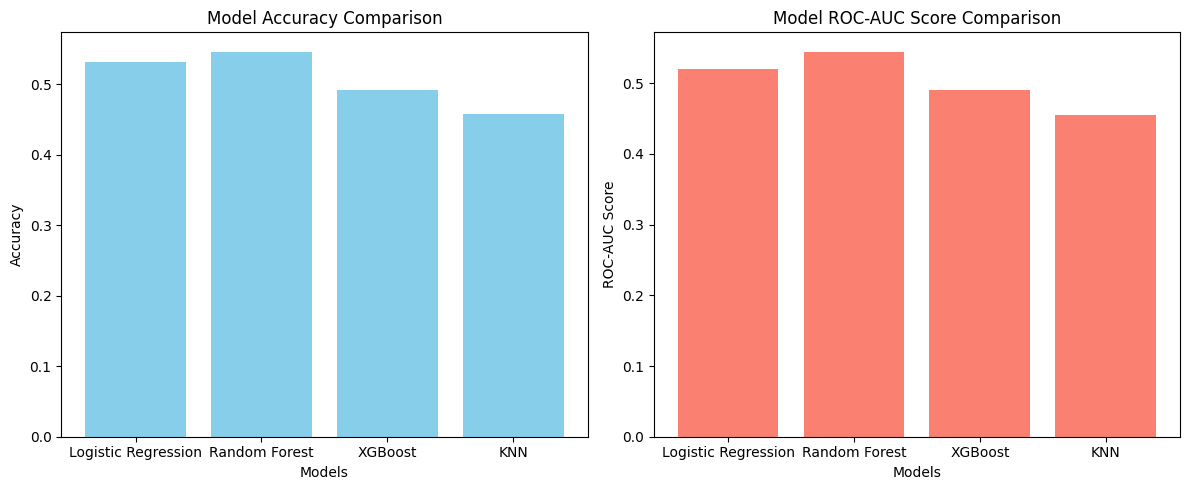

In [18]:
MLModelTest(x_train, y_train, x_test, y_test)

# Implement SVD 

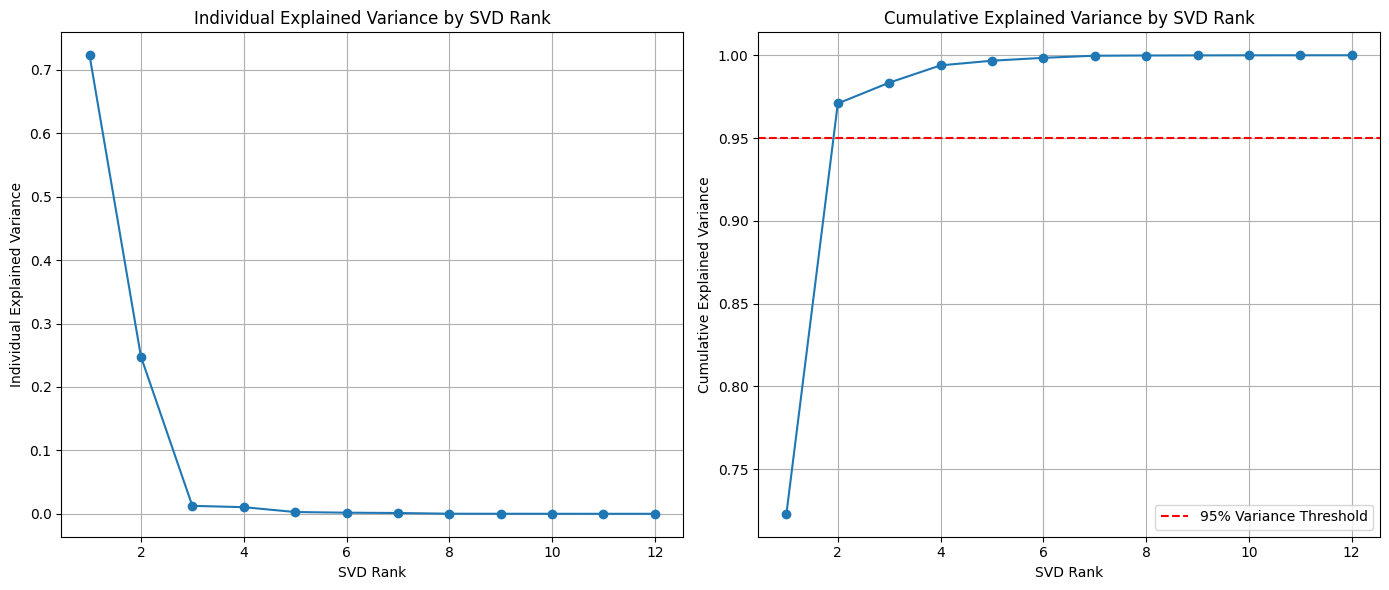

In [19]:
def evaluate_svd_variance(x_train, max_rank=50):
    """
    Evaluates both individual and cumulative explained variance for different SVD ranks.

    Parameters:
    - x_train (numpy array): Training feature matrix
    - max_rank (int): Maximum SVD rank to evaluate

    Returns:
    - None: Displays plots for individual and cumulative explained variance.
    """
    svd = TruncatedSVD(n_components=max_rank)
    svd.fit(x_train)

    # Individual explained variance
    explained_variance = svd.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Plotting
    plt.figure(figsize=(14, 6))

    # Individual explained variance
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_rank + 1), explained_variance, marker='o')
    plt.title('Individual Explained Variance by SVD Rank')
    plt.xlabel('SVD Rank')
    plt.ylabel('Individual Explained Variance')
    plt.grid()

    # Cumulative explained variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_rank + 1), cumulative_variance, marker='o')
    plt.title('Cumulative Explained Variance by SVD Rank')
    plt.xlabel('SVD Rank')
    plt.ylabel('Cumulative Explained Variance')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Example usage:
evaluate_svd_variance(x_train, max_rank=12)

# Plot correlation Heatmap after SVD

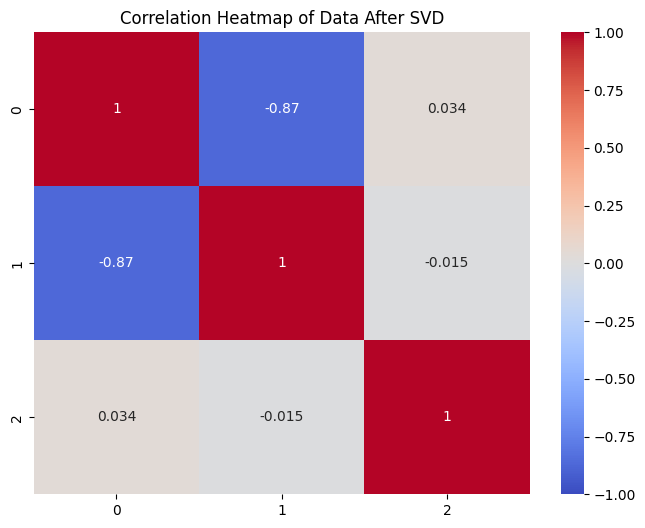

In [20]:
svd = TruncatedSVD(n_components=3)
x_train_svd = svd.fit_transform(x_train)
x_test_svd = svd.transform(x_test)


totalData = list(x_train_svd) + list(x_test_svd)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(totalData).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Data After SVD')
plt.show()

# Test ML models's accuracy after SVD


Model: Logistic Regression
Accuracy: 0.5423
ROC-AUC Score: 0.5322
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.97      0.68       133
         1.0       0.75      0.09      0.17       127

    accuracy                           0.54       260
   macro avg       0.64      0.53      0.43       260
weighted avg       0.64      0.54      0.43       260


Model: Random Forest
Accuracy: 0.5192
ROC-AUC Score: 0.5171
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.61      0.56       133
         1.0       0.51      0.43      0.46       127

    accuracy                           0.52       260
   macro avg       0.52      0.52      0.51       260
weighted avg       0.52      0.52      0.52       260


Model: XGBoost
Accuracy: 0.4923
ROC-AUC Score: 0.4908
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.56   

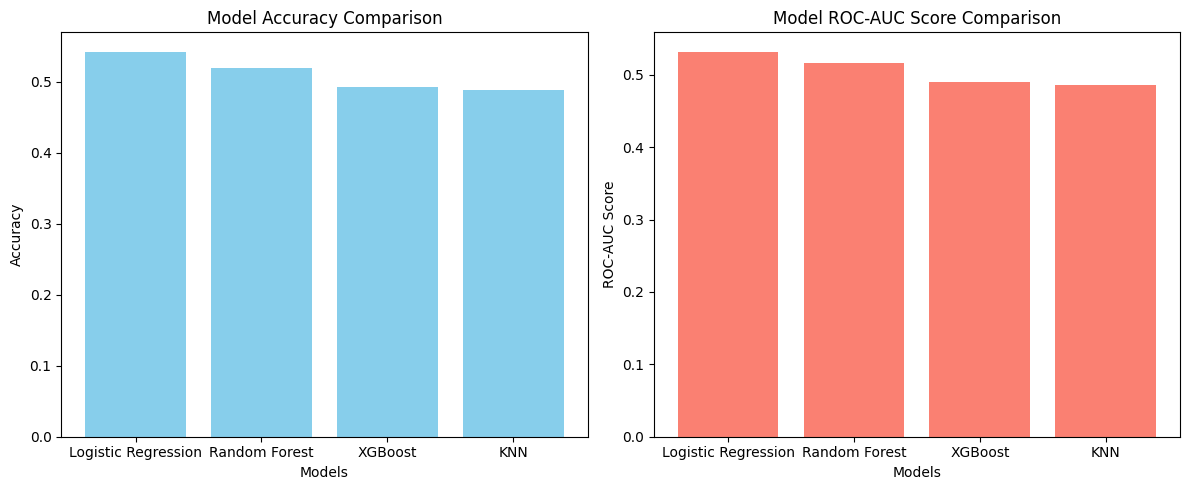

In [21]:
##### according to last evaluation, we selected rank=5 #######


MLModelTest(x_train_svd, y_train, x_test_svd, y_test)


# Test DMD on data

Eigenvalues:  [ 0.95284698  0.00935291 -0.03223161]
Number of Modes:  (13, 3)


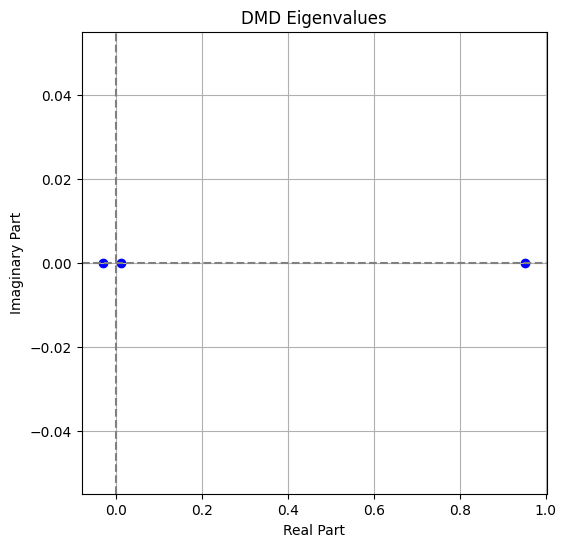

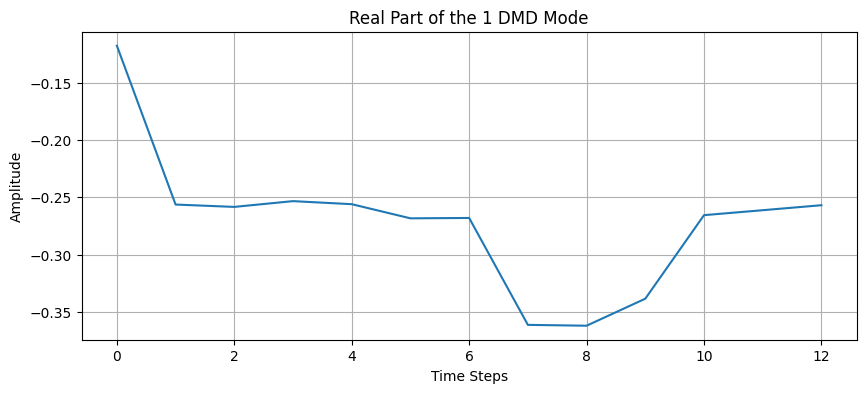

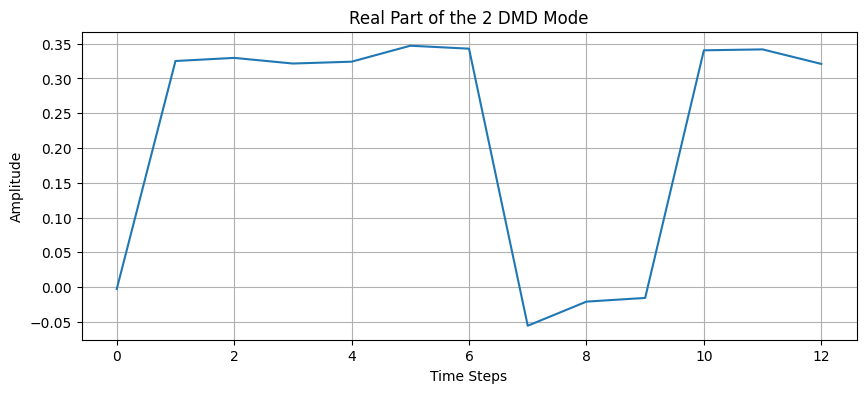

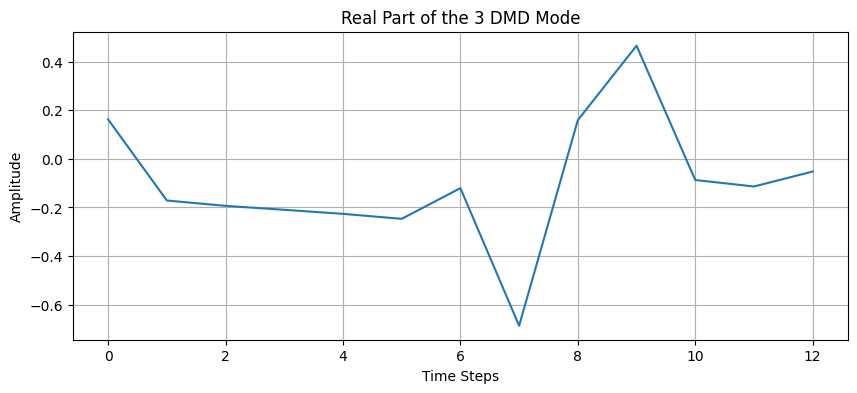

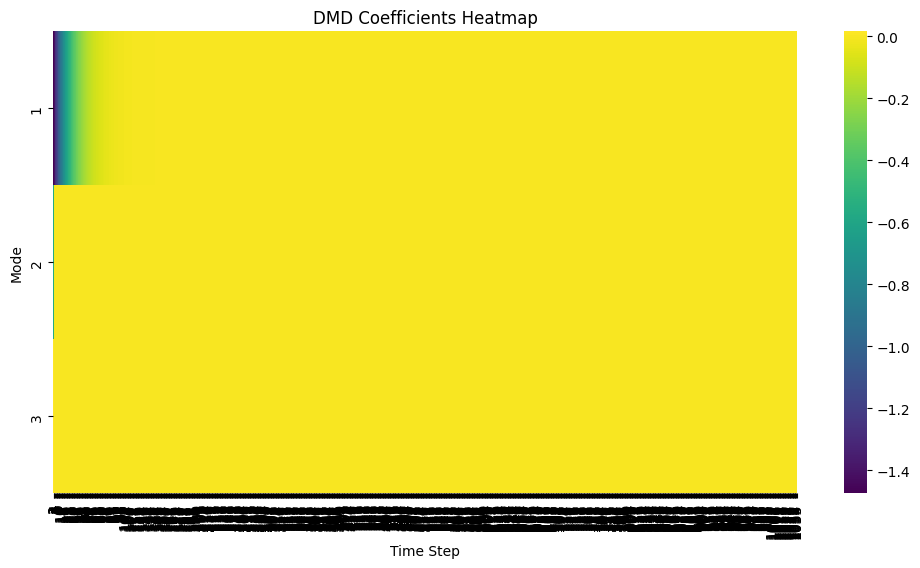

In [22]:
# Fit DMD to your data (assuming x_train is already defined)
dmd = DMD(svd_rank=3)
dmd.fit(x_train.T)  # DMD typically works with transposed matrices

# Check the DMD outputs
print("Eigenvalues: ", dmd.eigs)
print("Number of Modes: ", dmd.modes.shape)

# Extract DMD coefficients
dmd_coeffs = dmd.dynamics.real
eigenvalues = dmd.eigs

# Plotting DMD eigenvalues
plt.figure(figsize=(6, 6))
plt.scatter(eigenvalues.real, eigenvalues.imag, color='blue', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('DMD Eigenvalues')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.show()

# Manual plot of DMD modes (first, second, and third modes)
for i in range(3):
    mode_real = dmd.modes[:, i].real
    plt.figure(figsize=(10, 4))
    plt.plot(mode_real)
    plt.title(f'Real Part of the {i + 1} DMD Mode')
    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Plotting DMD coefficients as a heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(dmd_coeffs, cmap='viridis', cbar=True,
                       xticklabels=np.arange(1, dmd_coeffs.shape[1] + 1),
                       yticklabels=np.arange(1, dmd_coeffs.shape[0] + 1))

plt.title('DMD Coefficients Heatmap')
plt.xlabel('Time Step')
plt.ylabel('Mode')

# Adding colorbar explicitly to the heatmap
# plt.colorbar(heatmap.collections[0], label='Coefficient Value')  # Add colorbar referencing the heatmap
plt.show()


# Test DMD directly as classifier


Model: Logistic Regression
Accuracy: 0.4885
ROC-AUC Score: 0.5000
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       133
         1.0       0.49      1.00      0.66       127

    accuracy                           0.49       260
   macro avg       0.24      0.50      0.33       260
weighted avg       0.24      0.49      0.32       260


Model: Random Forest
Accuracy: 0.4885
ROC-AUC Score: 0.5000
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       133
         1.0       0.49      1.00      0.66       127

    accuracy                           0.49       260
   macro avg       0.24      0.50      0.33       260
weighted avg       0.24      0.49      0.32       260


Model: XGBoost
Accuracy: 0.4923
ROC-AUC Score: 0.5029
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.05   

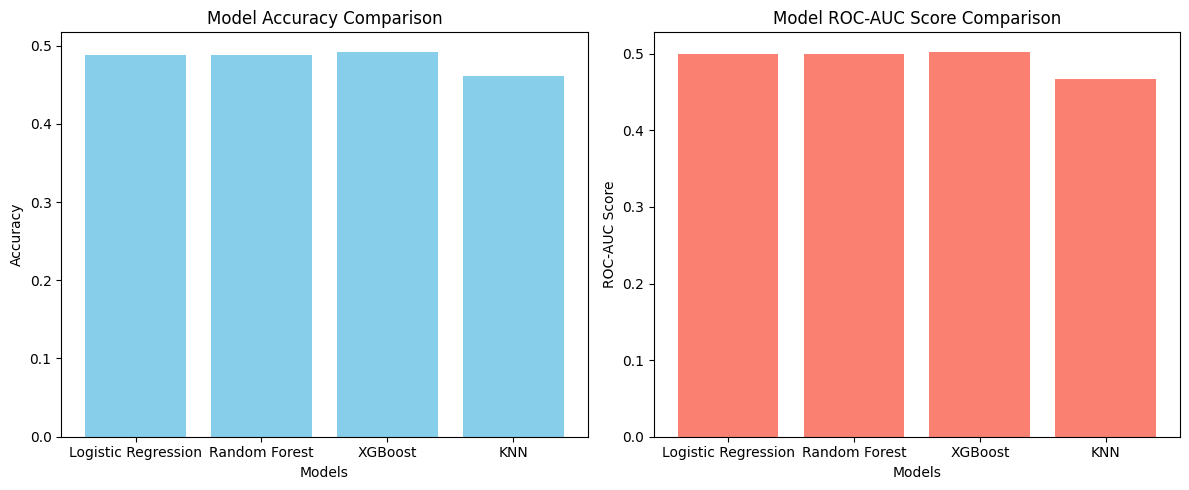

In [23]:
dmd = DMD(svd_rank=3)
dmd.fit(x_train.T)
dmd_modes = dmd.modes.real  # DMD modes
dmd_coeffs = dmd.dynamics.real  # Temporal coefficients
X_train_dmd = np.dot(dmd_modes, dmd_coeffs)  
# Transform test set
X_test_dmd = np.dot(dmd_modes, np.linalg.pinv(dmd_modes).dot(x_test.T)).T  # Project test data

MLModelTest(X_train_dmd.T, y_train, X_test_dmd, y_test)


# Test correlation test after DMD (DMD was used as a convertor)


(1036, 13)
DMD Modes shape: (13, 3)


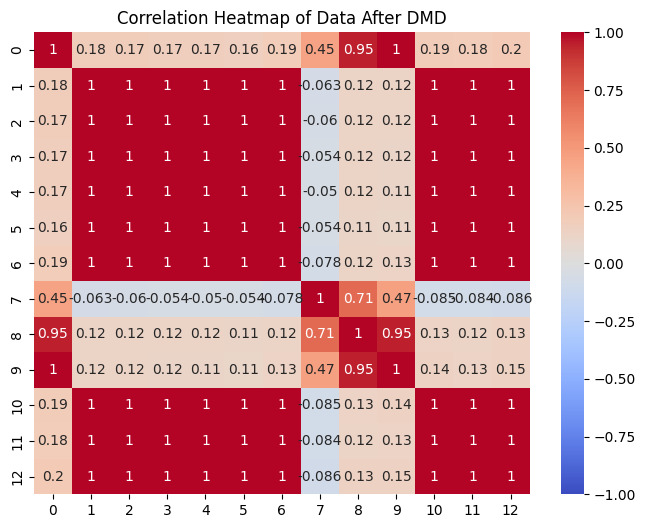

In [24]:
print(x_train.shape)
dmd = DMD(svd_rank=3)
dmd.fit(x_train.T)

print("DMD Modes shape:", dmd.modes.shape) 

 # Transform x_train and x_test using DMD modes
x_train_dmd = (dmd.modes @ np.linalg.pinv(dmd.modes) @ x_train.T).T
x_test_projected_dmd = (dmd.modes @ np.linalg.pinv(dmd.modes) @ x_test.T).T # Project x_test and reshape

totalData = list(x_train_dmd) + list(x_test_projected_dmd)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(totalData).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Data After DMD')
plt.show()

# Test DMD  with some of ML modles implementes after DMD on Test dataset


Model: Logistic Regression
Accuracy: 0.5423
ROC-AUC Score: 0.5322
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.97      0.68       133
         1.0       0.75      0.09      0.17       127

    accuracy                           0.54       260
   macro avg       0.64      0.53      0.43       260
weighted avg       0.64      0.54      0.43       260


Model: Random Forest
Accuracy: 0.5192
ROC-AUC Score: 0.5173
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.60      0.56       133
         1.0       0.51      0.43      0.47       127

    accuracy                           0.52       260
   macro avg       0.52      0.52      0.51       260
weighted avg       0.52      0.52      0.52       260


Model: XGBoost
Accuracy: 0.5423
ROC-AUC Score: 0.5406
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.62   

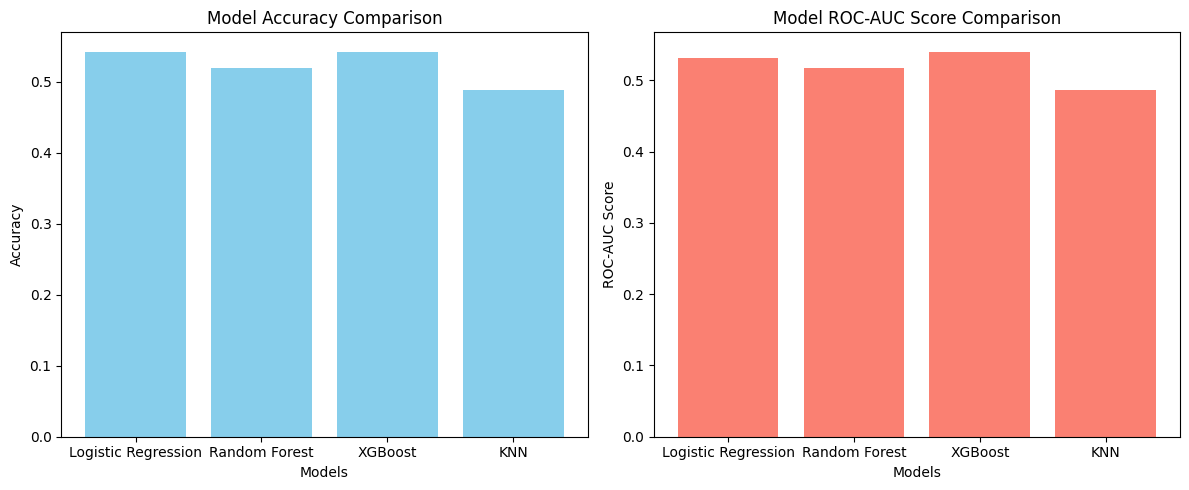

In [25]:
MLModelTest(x_train_dmd, y_train, x_test_projected_dmd, y_test)



# SINDy Implementation

In [26]:

# Apply SINDy
model = ps.SINDy(feature_names=data.columns,  # Use feature names if x_train is a DataFrame
                 differentiation_method=ps.FiniteDifference())


model.fit(x_train)
model.print()

coefficients = model.coefficients()
num_equations = coefficients.shape[0]  # Get the number of equations

# for i in range(num_equations):
#   plt.figure(figsize=(10, 5))
#   plt.bar(range(len(coefficients[i])), coefficients[i])  # Plot coefficients for each equation
#   plt.title('SINDy Coefficients for Equation {}'.format(i+1))
#   plt.xlabel('Feature Term Index')
#   plt.ylabel('Coefficient Value')
#   plt.show()

/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

(Volume)' = 0.000
(Open)' = 8.589 Open + 6.028 High + -6.802 Low + -10.722 Close + -4.689 EMA20 + 1.415 RSI + 4.325 MACD + -1.414 MACD_signal + 3093.543 BB_Middle + -1682.933 BB_Upper + -1482.159 BB_Lower + 11.070 Volume Open + -9.747 Volume High + -20.207 Volume Low + 17.562 Volume Close + 1.038 Volume RSI + 0.536 Volume MACD + -1.819 Volume MACD_signal + 4.330 Volume BB_Middle + -2.795 Volume BB_Lower + -108.371 Open^2 + 102.413 Open High + 167.346 Open Low + -45.257 Open MA60 + -23.108 Open RSI + -4.519 Open MACD_signal + -87.289 High Low + 8.548 High MA60 + -29.735 High EMA20 + 0.325 High MACD + -76.272 Low^2 + 35.209 Low MA60 + 23.622 Low EMA20 + 30.319 Low RSI + 31.591 Close^2 + -97.817 Close EMA20 + -12.778 Close RSI + 7.993 Close MACD_signal + 36.718 Close BB_Middle + 13.144 Close BB_Lower + -5.501 MA60 RSI + 6.319 MA60 MACD + -5.283 MA60 MACD_signal + 22.111 MA60 BB_Middle + -19.744 MA60 BB_Lower + 71.330 EMA20^2 + 3.976 EMA20 RSI + 14.498 EMA20 MACD + -15.673 EMA20 BB_Middle 

# SINDy for prediction


Model: Logistic Regression
Accuracy: 0.5154
ROC-AUC Score: 0.5050
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.95      0.67       133
         1.0       0.54      0.06      0.10       127

    accuracy                           0.52       260
   macro avg       0.53      0.51      0.38       260
weighted avg       0.53      0.52      0.39       260


Model: Random Forest
Accuracy: 0.5269
ROC-AUC Score: 0.5246
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.62      0.57       133
         1.0       0.52      0.43      0.47       127

    accuracy                           0.53       260
   macro avg       0.53      0.52      0.52       260
weighted avg       0.53      0.53      0.52       260


Model: XGBoost
Accuracy: 0.5231
ROC-AUC Score: 0.5210
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.61   

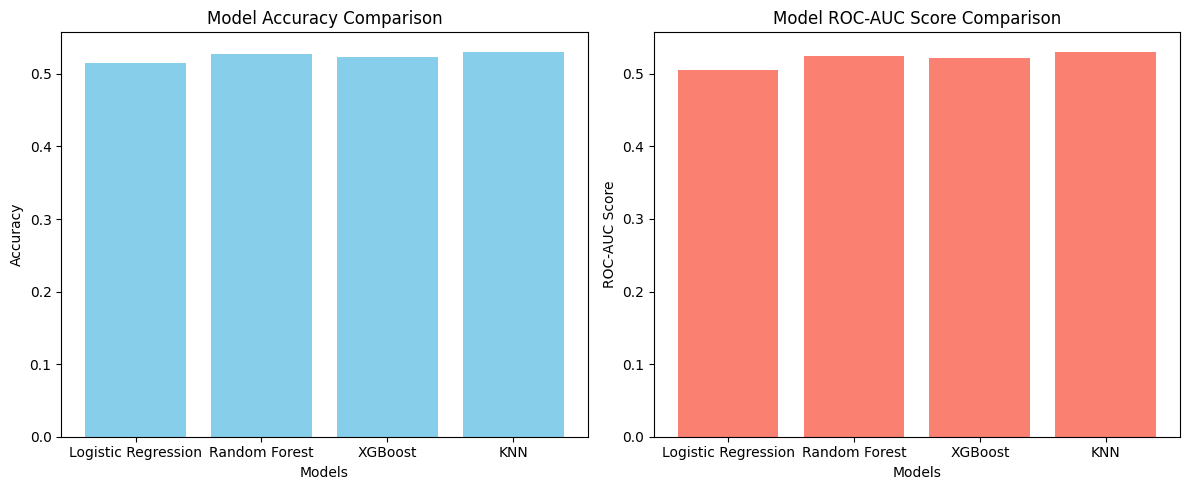

In [27]:
coefficients = model.coefficients()
x_train_transformed = np.dot(x_train, coefficients)
x_test_transformed = np.dot( x_test, coefficients)
MLModelTest(x_train_transformed, y_train, x_test_transformed, y_test)

# SVD + SINDy

/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/home/alihosseini8888/miniconda3/envs/torch/lib/python3.10/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


(Volume)' = 0.373 Open High + 0.836 High^2
(Open)' = -0.226 Open High + -0.440 High^2
(High)' = 0.000

Model: Logistic Regression
Accuracy: 0.5115
ROC-AUC Score: 0.5000
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      1.00      0.68       133
         1.0       0.00      0.00      0.00       127

    accuracy                           0.51       260
   macro avg       0.26      0.50      0.34       260
weighted avg       0.26      0.51      0.35       260


Model: Random Forest
Accuracy: 0.5385
ROC-AUC Score: 0.5368
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.61      0.57       133
         1.0       0.53      0.46      0.50       127

    accuracy                           0.54       260
   macro avg       0.54      0.54      0.54       260
weighted avg       0.54      0.54      0.54       260


Model: XGBoost
Accuracy: 0.5192
ROC-AUC Score: 0.5180
Classificatio

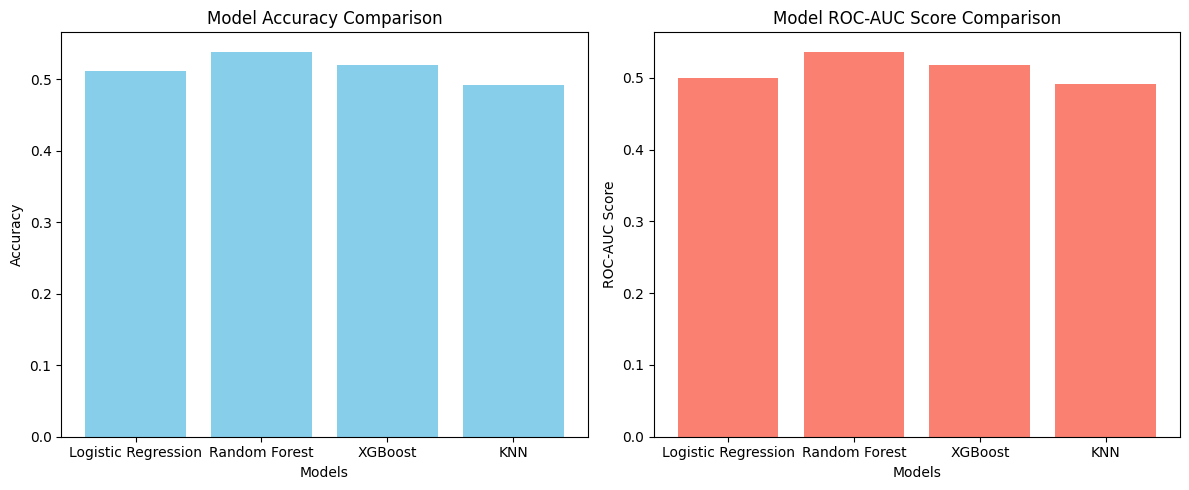

In [29]:
# Implement SinDy after SVD
svd = TruncatedSVD(n_components=3)
x_train_svd = svd.fit_transform(x_train)
x_test_svd = svd.transform(x_test)

model = ps.SINDy(feature_names=data.columns,  # Use feature names if x_train is a DataFrame
                 differentiation_method=ps.FiniteDifference())


model.fit(x_train_svd)
model.print()

coefficients = model.coefficients()
x_train_transformed = np.dot(x_train_svd, coefficients)
x_test_transformed = np.dot( x_test_svd, coefficients)
MLModelTest(x_train_transformed, y_train, x_test_transformed, y_test)


# SHRED Implementation